<br>
    Arinjay Jain (A20447307)
        </br>

<br>Machine Learning Assignment-3 </br>

Question 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

claimHistory = pandas.read_csv('F:\Assigmnents\Machine Learning\Assigmnent_03\claim_history.csv',
                            delimiter=',')

In [2]:
print('Number of Missing Values:')
claimHistory.isna().sum()
## We do not have any missing values in our predictor('EDUCATION','OCCUPATION','CAR_TYPE') and target variable(CAR_USE)

Number of Missing Values:


ID               0
KIDSDRIV         0
BIRTH            0
AGE              7
HOMEKIDS         0
YOJ            548
INCOME         570
PARENT1          0
HOME_VAL      3483
MSTATUS          0
GENDER           0
EDUCATION        0
OCCUPATION       0
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
REVOKED          0
MVR_PTS          0
CLM_AMT          0
CAR_AGE        640
URBANICITY       0
CLM_COUNT        0
EXPOSURE         0
dtype: int64

In [43]:
#Question 1 (a)
#test_size = 0.25 25% will assign into test partition 
claimHistory_train, claimHistory_test = train_test_split(claimHistory, test_size = 0.25, random_state = 60616)


In [44]:
#total observation
claimHistory.shape[0]

10302

In [45]:
# number of observation in training 
trainCount = claimHistory_train.shape[0]
trainCount

7726

In [46]:
# number of observation in test 
testCount = claimHistory_test.shape[0]
testCount

2576

In [47]:
#Count 
claimHistory_train.groupby('CAR_USE').size()

CAR_USE
Commercial    2851
Private       4875
dtype: int64

In [48]:
# proportions
claimHistory_train.groupby('CAR_USE').size()/trainCount

CAR_USE
Commercial    0.369014
Private       0.630986
dtype: float64

In [9]:
#Question 1 (b)counts and proportions of the target variable in the Test partition
#Counts
claimHistory_test.groupby('CAR_USE').size()

CAR_USE
Commercial     938
Private       1638
dtype: int64

In [10]:
#proportions
claimHistory_test.groupby('CAR_USE').size()/testCount

CAR_USE
Commercial    0.36413
Private       0.63587
dtype: float64

In [11]:
#Question 1 (c)
# What is the probability that an observation is in the Training partition given that CAR_USE = Commercial?
probTrain = 0.75
probTest = 0.25
probTrainCommCar = 0.369014
probTestCommCar = 0.36413

In [50]:
# By Bayes Theorem
a = probTrainCommCar * probTrain
b = probTestCommCar * probTest
prob_of_Comm_Car_in_Training = a/(a+b)
prob_of_Comm_Car_in_Training

0.7524898516284976

In [51]:
#Question 1 (d)
#What is the probability that an observation is in the Test partition given that CAR_USE = Private?
probTrainPrivateCar = 0.630986
probTestPrivateCar = 0.63587
c = probTrainPrivateCar * probTrain
d = probTestPrivateCar * probTest
prob_of_Private_Car_in_Test = d/(c+d)
prob_of_Private_Car_in_Test

0.2514484970903517

Question 2

In [52]:
# Question 2
import itertools
def EntropyCalculator (data, split):    
        #data predictor in column 0 and target in column 1
        #split split set : combinations of predictors levels  
    countTable = pandas.crosstab(index = (data.iloc[:,0]).isin(split),columns = data.iloc[:,1],margins = False, dropna = True)
    fractionTable = countTable.div(countTable.sum(1), axis = 'index')
    totalRows = fractionTable.shape[0]
    totalColumns = fractionTable.shape[1]
    tableEntropy = 0
    tableN = 0
    for iRow in range(totalRows):
        rowEntropy = 0
        rowN = 0
        for iColumn in range(totalColumns):
            rowN += countTable.iloc[iRow, iColumn]
            proportion = fractionTable.iloc[iRow, iColumn]
            if (proportion > 0):
                rowEntropy -= (proportion * math.log2(proportion))
        tableEntropy += (rowN * rowEntropy)
        tableN += rowN
    tableEntropy = tableEntropy /  tableN
    return(tableEntropy)

def forNominalSplit (data):   
# data: predictor in column 0 and target in column 1
    catPred = set(data.iloc[:,0])
    nCatPred = len(catPred)
    treeResult = pandas.DataFrame(columns = ['Count of Left Child', 'Left Child', 'Right Child', 'Entropy'])
    for i in range(1, round((nCatPred+1)/2)):
        allComb_i = itertools.combinations(catPred, i)
        for comb in list(allComb_i):
            combComp = catPred.difference(comb)
            EV = EntropyCalculator(data, comb)
            treeResult = treeResult.append(pandas.DataFrame([[i, sorted(comb), sorted(combComp), EV]], 
                                           columns = ['Count of Left Child', 'Left Child', 'Right Child', 'Entropy']),
                                           ignore_index = True)

    treeResult = treeResult.sort_values(by = 'Entropy', axis = 0, ascending = True)
    return(treeResult)

def forOrdinalSplit (data, predValue):    
    catPred = set(predValue)
    nCatPred = len(catPred)
    treeResult = pandas.DataFrame(columns = ['Count of Left Child', 'Left Child', 'Right Child', 'Entropy'])
    for i in range(1, nCatPred):
        comb = list(predValue[0:i])
        combComp = list(predValue[i:nCatPred])
        EV = EntropyCalculator(data, comb)
        treeResult = treeResult.append(pandas.DataFrame([[i, comb, combComp, EV]], 
                                       columns = ['Count of Left Child', 'Left Child', 'Right Child', 'Entropy']),
                                       ignore_index = True)

    treeResult = treeResult.sort_values(by = 'Entropy', axis = 0, ascending = True)
    return(treeResult)

In [53]:
#Question 2 
#Question 2 a)
#Root node entropy, from traning datasets
import math
rootEntropy = -(probTrainCommCar * math.log2(probTrainCommCar) + probTrainPrivateCar * math.log2(probTrainPrivateCar))
print("Entropy value of the root node", rootEntropy)

Entropy value of the root node 0.9499120060532422


In [54]:
# Question 2(b)
# for predictor EDUCATION
data = claimHistory_train[['EDUCATION', 'CAR_USE']]
levels=np.unique(claimHistory_train["EDUCATION"])
print(levels)
#we want in this order ['Below High School', 'High School', 'Bachelors', 'Masters', 'Doctors']
treeEDUCATION = forOrdinalSplit(data,[levels[1], levels[3], levels[0], levels[4], levels[2]])
treeEDUCATION.iloc[0] #min entropy of education table


['Bachelors' 'Below High School' 'Doctors' 'High School' 'Masters']


Count of Left Child                                             1
Left Child                                    [Below High School]
Right Child            [High School, Bachelors, Masters, Doctors]
Entropy                                                  0.938232
Name: 0, dtype: object

In [55]:
# for predictor OCCUPATION
data = claimHistory_train[['OCCUPATION', 'CAR_USE']]
treeOCCUPATION = forNominalSplit(data)
treeOCCUPATION.iloc[0]

Count of Left Child                                                    3
Left Child                               [Blue Collar, Student, Unknown]
Right Child            [Clerical, Doctor, Home Maker, Lawyer, Manager...
Entropy                                                         0.713872
Name: 46, dtype: object

In [56]:
# for predictor Car Type 
data = claimHistory_train[['CAR_TYPE', 'CAR_USE']]
treeCARTYPE = forNominalSplit(data)
treeCARTYPE.iloc[0]

Count of Left Child                             3
Left Child             [Minivan, SUV, Sports Car]
Right Child            [Panel Truck, Pickup, Van]
Entropy                                  0.768504
Name: 37, dtype: object

In [57]:
# Question 2(c)
data = claimHistory_train[['OCCUPATION', 'CAR_USE']]
split = list(['Blue Collar', 'Student', 'Unknown'])
EntropyCalculator(data, split)


0.7138723890228705

In [34]:
# Question 2(d)
# only those observations are in the left branch which has 'Blue Collar', 'Student', 'Unknown' OCCUPATION. 
left_Branch = claimHistory_train[claimHistory_train['OCCUPATION'].isin(['Blue Collar', 'Student', 'Unknown'])]
print("Left Side if layer 1 \n")
data = left_Branch[['CAR_TYPE', 'CAR_USE']]
left_tree_CAR_TYPE = forNominalSplit(data)
print(left_tree_CAR_TYPE.iloc[0])

data = left_Branch[['OCCUPATION', 'CAR_USE']]
left_tree_OCCUPATION = forNominalSplit(data)
print(left_tree_OCCUPATION.iloc[0])

data = left_Branch[['EDUCATION', 'CAR_USE']]
left_tree_EDUCATION = forOrdinalSplit(data, [levels[1], levels[3], levels[0], levels[4], levels[2]])
print(left_tree_EDUCATION.iloc[0])


# only those observations are in the right branch which are not in left branch means other the 'Blue Collar', 'Student', 'Unknown' OCCUPATION. 
right_Branch = claimHistory_train[~claimHistory_train['OCCUPATION'].isin(['Blue Collar', 'Student', 'Unknown'])]
print("\nRight Side if layer 1 \n")
data = right_Branch[['CAR_TYPE', 'CAR_USE']]
right_tree_CAR_TYPE = forNominalSplit(data)
print(right_tree_CAR_TYPE.iloc[0])

data = right_Branch[['OCCUPATION', 'CAR_USE']]
right_tree_OCCUPATION = forNominalSplit(data)
print(right_tree_OCCUPATION.iloc[0])

data = right_Branch[['EDUCATION', 'CAR_USE']]
right_tree_EDUCATION = forOrdinalSplit(data, [levels[1], levels[3], levels[0], levels[4], levels[2]])
print(right_tree_EDUCATION.iloc[0])

Left Side if layer 1 

Count of Left Child                             3
Left Child             [Minivan, SUV, Sports Car]
Right Child            [Panel Truck, Pickup, Van]
Entropy                                  0.769665
Name: 37, dtype: object
Count of Left Child                         1
Left Child                          [Student]
Right Child            [Blue Collar, Unknown]
Entropy                              0.802303
Name: 2, dtype: object
Count of Left Child                                             1
Left Child                                    [Below High School]
Right Child            [High School, Bachelors, Masters, Doctors]
Entropy                                                  0.673644
Name: 0, dtype: object

Right Side if layer 1 

Count of Left Child                             3
Left Child             [Minivan, SUV, Sports Car]
Right Child            [Panel Truck, Pickup, Van]
Entropy                                  0.328087
Name: 37, dtype: object
Count of L

In [58]:
# Question 2(e)
def leaf (row):
    if (numpy.isin(row['OCCUPATION'], ['Blue Collar', 'Student', 'Unknown'])):
        if (numpy.isin(row['EDUCATION'], ['Below High School'])):
            Leaf = 0
        else:
            Leaf = 1
    else:
        if (numpy.isin(row['CAR_TYPE'], ['Minivan', 'SUV', 'Sports Car'])):
            Leaf = 2
        else:
            Leaf = 3

    return(Leaf)

claimHistory_train = claimHistory_train.assign(Leaf = claimHistory_train.apply(leaf, axis = 1))

countTable = pandas.crosstab(index = claimHistory_train['Leaf'], columns = claimHistory_train['CAR_USE'],
                             margins = False, dropna = True)
probabilityCARUSE = countTable.div(countTable.sum(1), axis = 'index')

print('Counts:')
print(countTable)
print('\n')
print('probabilityCAR_USE:')
print(probabilityCARUSE)

Counts:
CAR_USE  Commercial  Private
Leaf                        
0               173      460
1              1920      356
2                23     3409
3               735      650


probabilityCAR_USE:
CAR_USE  Commercial   Private
Leaf                         
0          0.273302  0.726698
1          0.843585  0.156415
2          0.006702  0.993298
3          0.530686  0.469314


In [78]:
#Question 2 f)
def leaf_prob_Commercial (row):
    predProb = probabilityCARUSE.iloc[row['Leaf']]
    pCAR_USE_Commercial = predProb['Commercial']
    return(pCAR_USE_Commercial)

def leaf_prob_Private (row):
    predProb = probabilityCARUSE.iloc[row['Leaf']]
    pCAR_USE_Private = predProb['Private']
    return(pCAR_USE_Private)

claimHistory_train = claimHistory_train.assign(probTrainCAR_USE_Commercial = claimHistory_train.apply(leaf_prob_Commercial, axis = 1))

threshold = claimHistory_train.groupby('CAR_USE').size()/trainCount
threshold = threshold[0] #proportion of target Event(Commercial) value in the training partition 
print("Threshold: ", threshold)

fpr_train, tpr_train, thresholds_train =  metrics.roc_curve(claimHistory_train['CAR_USE'], claimHistory_train['probTrainCAR_USE_Commercial'], pos_label = 'Commercial')

Threshold:  0.3690137199068082


In [79]:
print(thresholds_train)
print(tpr_train-fpr_train)

[1.84358524 0.84358524 0.53068592 0.27330174 0.00670163]
[0.         0.60042227 0.72489322 0.69121471 0.        ]


In [85]:
claimHistory_train

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,RED_CAR,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,URBANICITY,CLM_COUNT,EXPOSURE,Leaf,probTrainCAR_USE_Commercial
724,57808809,0,3-Aug-56,43.0,4,11.0,70000.0,No,272000.0,Yes,...,yes,No,0,0,7.0,Highly Urban/ Urban,0,1.000,1,0.843585
5793,250018825,0,8-Nov-64,35.0,1,12.0,9000.0,No,80000.0,Yes,...,yes,No,6,5913,17.0,Highly Urban/ Urban,5,1.000,3,0.530686
1939,930884352,0,21-Nov-38,60.0,0,14.0,64000.0,No,NaN,Yes,...,yes,No,6,0,NaN,Highly Urban/ Urban,0,1.000,1,0.843585
796,484814016,0,24-Dec-68,30.0,2,11.0,13000.0,No,95000.0,Yes,...,no,Yes,1,4578,1.0,Highly Urban/ Urban,2,0.711,1,0.843585
6048,529619897,1,1-May-59,40.0,3,15.0,3000.0,No,NaN,Yes,...,yes,No,3,0,6.0,Highly Rural/ Rural,0,1.000,0,0.273302
1265,481754281,0,22-Jul-59,40.0,0,0.0,0.0,No,56000.0,No,...,no,No,3,0,18.0,Highly Urban/ Urban,0,1.000,2,0.006702
8586,566109162,0,1-Dec-62,36.0,2,11.0,14000.0,Yes,NaN,No,...,no,No,5,0,1.0,Highly Rural/ Rural,0,1.000,2,0.006702
2911,624399353,0,9-Apr-57,42.0,2,13.0,89000.0,Yes,NaN,No,...,no,Yes,2,23805,10.0,Highly Urban/ Urban,5,1.000,1,0.843585
7332,667450590,0,27-Jan-59,40.0,0,14.0,61000.0,No,159000.0,Yes,...,yes,No,0,3022,22.0,Highly Urban/ Urban,3,1.000,2,0.006702
720,247424045,2,27-Mar-57,42.0,2,17.0,69000.0,No,200000.0,Yes,...,yes,No,0,0,6.0,Highly Rural/ Rural,0,1.000,1,0.843585


<br>
    Question 3
    </br>

In [80]:
# Question 3
claimHistory_test = claimHistory_test.assign(Leaf = claimHistory_test.apply(leaf, axis = 1))
claimHistory_test = claimHistory_test.assign(probCAR_USE_Commercial = claimHistory_test.apply(leaf_prob_Commercial, axis = 1))
claimHistory_test = claimHistory_test.assign(probCAR_USE_Private = claimHistory_test.apply(leaf_prob_Private, axis = 1))

In [81]:
import matplotlib.pyplot as plt
import numpy
import sklearn.metrics as metrics

threshold = claimHistory_train.groupby('CAR_USE').size()/trainCount
threshold = threshold[0] #proportion of target Event(Commercial) value in the training partition 
print("Threshold: ", threshold)
claimHistory_test['predictedCAR_USE'] = numpy.where(claimHistory_test['probCAR_USE_Commercial'] >= threshold, 'Commercial', 'Private')

Threshold:  0.3690137199068082


In [82]:
claimHistory_test

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,MVR_PTS,CLM_AMT,CAR_AGE,URBANICITY,CLM_COUNT,EXPOSURE,Leaf,probCAR_USE_Commercial,probCAR_USE_Private,predictedCAR_USE
994,735675417,0,8-Sep-69,30.0,0,0.0,0.0,No,NaN,No,...,0,0,7.0,Highly Rural/ Rural,0,0.918,2,0.006702,0.993298,Private
9470,136529714,2,8-Jul-53,46.0,0,0.0,0.0,No,NaN,No,...,0,4573,12.0,Highly Urban/ Urban,2,1.000,3,0.530686,0.469314,Commercial
7963,125543499,1,16-Mar-56,43.0,3,15.0,123000.0,Yes,NaN,No,...,4,4004,14.0,Highly Urban/ Urban,3,1.000,1,0.843585,0.156415,Commercial
4881,751746887,0,30-Apr-50,49.0,0,13.0,147000.0,No,394000.0,No,...,0,0,22.0,Highly Urban/ Urban,0,1.000,2,0.006702,0.993298,Private
741,320781931,1,21-Mar-61,38.0,1,14.0,39000.0,Yes,NaN,No,...,0,0,1.0,Highly Rural/ Rural,0,1.000,1,0.843585,0.156415,Commercial
9609,821199816,0,31-May-58,41.0,0,NaN,79000.0,No,201000.0,Yes,...,4,0,17.0,Highly Urban/ Urban,0,0.258,3,0.530686,0.469314,Commercial
1872,864565484,0,26-Nov-70,28.0,2,14.0,60000.0,No,194000.0,Yes,...,8,0,14.0,Highly Urban/ Urban,0,1.000,1,0.843585,0.156415,Commercial
3529,579393787,0,10-Feb-56,43.0,0,12.0,12000.0,No,NaN,No,...,0,0,9.0,Highly Rural/ Rural,0,1.000,2,0.006702,0.993298,Private
3253,166240500,0,22-May-54,45.0,0,9.0,26000.0,No,NaN,No,...,2,0,1.0,Highly Urban/ Urban,0,1.000,3,0.530686,0.469314,Commercial
1938,511966190,0,17-Jan-68,31.0,1,11.0,58000.0,No,187000.0,Yes,...,0,0,8.0,Highly Urban/ Urban,0,1.000,1,0.843585,0.156415,Commercial


In [91]:
# Question 3 a)
Matrix = metrics.confusion_matrix(claimHistory_test['CAR_USE'], claimHistory_test['predictedCAR_USE'])
print('Confusion Matrix')
print(Matrix)
print('\n')

Confusion Matrix
[[ 888   50]
 [ 336 1302]]




In [92]:
MCRate = 1.0 - metrics.accuracy_score(claimHistory_test['CAR_USE'], claimHistory_test['predictedCAR_USE'])
print('Misclassification Rate:', MCRate) 

Misclassification Rate: 0.14984472049689446


In [93]:
# Question 3 b)
fpr, tpr, thresholds = metrics.roc_curve(claimHistory_test['CAR_USE'], claimHistory_test['probCAR_USE_Commercial'], pos_label = 'Commercial')


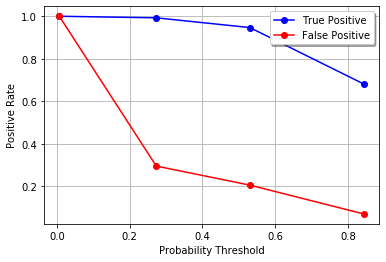

In [94]:
# Draw the Kolmogorov Smirnov curve
cutoff = numpy.where(thresholds > 1.0, numpy.nan, thresholds)
plt.plot(cutoff, tpr, marker = 'o',
         color = 'blue', linestyle = 'solid', label = 'True Positive')
plt.plot(cutoff, fpr, marker = 'o',
         color = 'red', linestyle = 'solid', label = 'False Positive')
plt.grid(True)
plt.xlabel("Probability Threshold")
plt.ylabel("Positive Rate")
plt.legend(loc = 'upper right', shadow = True)
plt.show()


In [95]:
print(thresholds)
print(tpr-fpr)

[1.84358524 0.84358524 0.53068592 0.27330174 0.00670163]
[0.         0.6116396  0.74156689 0.69766552 0.        ]


In [96]:
accuracy = metrics.accuracy_score(claimHistory_test['CAR_USE'], claimHistory_test['predictedCAR_USE'])
print('                  Accuracy: {:.13f}' .format(accuracy))
#Misclassification Rate
print('    Misclassification Rate: {:.13f}' .format(1-accuracy))

                  Accuracy: 0.8501552795031
    Misclassification Rate: 0.1498447204969


In [97]:
# Question 3 c)
# Calculate the Root Average Squared Error
nY = claimHistory_test['CAR_USE'].shape[0]
Y = numpy.array(claimHistory_test['CAR_USE'])
predProbY = numpy.array(claimHistory_test['probCAR_USE_Commercial'])
RASE = 0.0
for i in range(nY):
    if (Y[i] == 'Commercial'):
        RASE += (1 - predProbY[i])**2
    else:
        RASE += (0 - predProbY[i])**2
RASE = numpy.sqrt(RASE/nY)
print('Root Average Squared Error')
print(RASE)

Root Average Squared Error
0.3144866942298878


In [98]:
# Question 3 d)
Y_true = 1.0 * numpy.isin(Y, ['Commercial'])
AUC = metrics.roc_auc_score(Y_true, predProbY)
print('          Area Under Curve: {:.13f}' .format(AUC))

          Area Under Curve: 0.9235377273757


In [99]:
# Question 3 e)
#Gini Coefficient in the Test partition
Gini = 2*AUC -1 
print('          Gini Coefficient: {:.13f}' .format(Gini))

          Gini Coefficient: 0.8470754547514


In [100]:
# Question 3 f)

carUSE = numpy.array(claimHistory_test['CAR_USE'])

df=pandas.DataFrame({'x':carUSE, 'y':predProbY})
noneventProb = []
eventProb = []
for i in range(df.shape[0]):
    if df['x'][i] == 'Private':
        noneventProb.append(df['y'][i])
    else:
        eventProb.append(df['y'][i])

In [101]:
Concordant = 0
Discordant = 0
Tied = 0
for i in range(len(eventProb)):
    for j in range (len(noneventProb)):
        if eventProb[i] > noneventProb[j]:
            Concordant = Concordant +1
        elif eventProb[i] == noneventProb[j]:
            Tied = Tied +1 
        elif eventProb[i] < noneventProb[j]:
            Discordant = Discordant +1
            
pair = Concordant + Discordant +Tied
print("Number of Pairs: ", pair)
print("Number of Concordant (C) pairs: ", Concordant)
print("Number of Discordant (D) pairs: ", Discordant)
print("Number of Tied (T) pairs: ", Tied)

print("Gini: ", (Concordant - Discordant)/pair)
print("GoodMan Gamma : ", ((Concordant - Discordant)/(Concordant + Discordant)))

#AUC using formula
Area = 0.5 + 0.5*((Concordant - Discordant)/pair)
print('Area Under Curve: {:.13f}' .format(AUC))

Number of Pairs:  1536444
Number of Concordant (C) pairs:  1347699
Number of Discordant (D) pairs:  46215
Number of Tied (T) pairs:  142530
Gini:  0.8470754547513609
GoodMan Gamma :  0.9336903137496287
Area Under Curve: 0.9235377273757


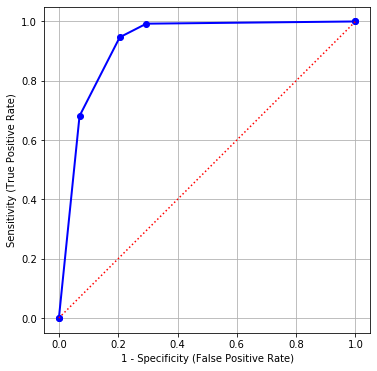

In [102]:
# Question 3(g)
# Generate the coordinates for the ROC curve
OneMinusSpecificity, Sensitivity, thresholds = metrics.roc_curve(claimHistory_test['CAR_USE'], claimHistory_test['probCAR_USE_Commercial'], pos_label = 'Commercial')

# Add two dummy coordinates
OneMinusSpecificity = numpy.append([0], OneMinusSpecificity)
Sensitivity = numpy.append([0], Sensitivity)

OneMinusSpecificity = numpy.append(OneMinusSpecificity, [1])
Sensitivity = numpy.append(Sensitivity, [1])

# Draw the ROC curve
plt.figure(figsize=(6,6))
plt.plot(OneMinusSpecificity, Sensitivity, marker = 'o',
         color = 'blue', linestyle = 'solid', linewidth = 2, markersize = 6)
plt.plot([0, 1], [0, 1], color = 'red', linestyle = ':')
plt.grid(True)
plt.xlabel("1 - Specificity (False Positive Rate)")
plt.ylabel("Sensitivity (True Positive Rate)")
ax = plt.gca()
ax.set_aspect('equal')
plt.show()